#### Rex Gayas DSC350-T301 Data Wrangling for Data Scienc (2243-1)
#### Term Project Milestone 5 02 MAR 2024

In [51]:
import pandas as pd

# Load the dataset 
df_air = pd.read_csv(r"D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Project\Datasets\Air_Quality.csv")

# Name new headers
new_headers = [
    'Unique ID', 'Indicator ID', 'Name', 'Measure', 
    'Measure Info', 'Geo Type Name', 'Geo Join ID', 
    'Geo Place Name', 'Time Period', 'Start Date', 
    'Data Value', 'Message'
]

# Replace headers
df_air.columns = new_headers

# Display DataFrame to check the new headers
print(df_air.head())


   Unique ID  Indicator ID                  Name Measure Measure Info  \
0     216498           386            Ozone (O3)    Mean          ppb   
1     216499           386            Ozone (O3)    Mean          ppb   
2     219969           386            Ozone (O3)    Mean          ppb   
3     219970           386            Ozone (O3)    Mean          ppb   
4     164876           383  Sulfur Dioxide (SO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                    Geo Place Name  \
0            CD          313               Coney Island (CD13)   
1            CD          313               Coney Island (CD13)   
2       Borough            1                             Bronx   
3       Borough            1                             Bronx   
4            CD          211  Morris Park and Bronxdale (CD11)   

      Time Period  Start Date  Data Value  Message  
0     Summer 2013  06/01/2013       34.64      NaN  
1     Summer 2014  06/01/2014       33.22      NaN  
2    

In [52]:
import pandas as pd

# Load the dataset 
df_air = pd.read_csv(r"D:\ALPHA\Dynamic Folder\Bellevue\Winter 2023\Data Wrangling\Project\Datasets\Air_Quality.csv")

# Format 'Start_Date' to standard date format 'Year-Month-Day'
df_air['Start_Date'] = pd.to_datetime(df_air['Start_Date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Check first few rows to verify 
print(df_air.head())


   Unique ID  Indicator ID                  Name Measure Measure Info  \
0     216498           386            Ozone (O3)    Mean          ppb   
1     216499           386            Ozone (O3)    Mean          ppb   
2     219969           386            Ozone (O3)    Mean          ppb   
3     219970           386            Ozone (O3)    Mean          ppb   
4     164876           383  Sulfur Dioxide (SO2)    Mean          ppb   

  Geo Type Name  Geo Join ID                    Geo Place Name  \
0            CD          313               Coney Island (CD13)   
1            CD          313               Coney Island (CD13)   
2       Borough            1                             Bronx   
3       Borough            1                             Bronx   
4            CD          211  Morris Park and Bronxdale (CD11)   

      Time Period  Start_Date  Data Value  Message  
0     Summer 2013  2013-06-01       34.64      NaN  
1     Summer 2014  2014-06-01       33.22      NaN  
2    

In [53]:
# Show the correct column name from the output of df.columns
df_air['Start_Date'] = pd.to_datetime(df_air['Start_Date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Verify the change
print(df_air['Start_Date'].head())


0    2013-06-01
1    2014-06-01
2    2013-06-01
3    2014-06-01
4    2008-12-01
Name: Start_Date, dtype: object


In [54]:
# Select 'Data Value' as the numeric column to find outliers
Q1 = df_air['Data Value'].quantile(0.25)
Q3 = df_air['Data Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers_df_air = df_air[(df_air['Data Value'] < lower_bound) | (df_air['Data Value'] > upper_bound)]
non_outliers_df_air = df_air[(df_air['Data Value'] >= lower_bound) & (df_air['Data Value'] <= upper_bound)]

# Display outliers
print("Outliers:")
print(outliers_df_air)

Outliers:
       Unique ID  Indicator ID  \
22        130355           639   
23        130356           639   
24        130357           639   
25        130358           639   
26        130359           639   
...          ...           ...   
13994     628936           659   
13995     628937           659   
14012     628954           659   
14013     628955           659   
14014     628956           659   

                                                    Name  \
22                             PM2.5-Attributable Deaths   
23                             PM2.5-Attributable Deaths   
24                             PM2.5-Attributable Deaths   
25                             PM2.5-Attributable Deaths   
26                             PM2.5-Attributable Deaths   
...                                                  ...   
13994  O3-Attributable Asthma Emergency Department Vi...   
13995  O3-Attributable Asthma Emergency Department Vi...   
14012  O3-Attributable Asthma Emergency D

In [55]:
# Identify duplicates based on all columns
duplicates = df_air[df_air.duplicated()]

# Display the duplicates
print("Duplicate Rows:")
print(duplicates)

# Remove duplicates while keeping first occurrence
df_air = df_air.drop_duplicates()

# Verify removal of duplicates by checking shape of the DataFrame
print("DataFrame shape after removing duplicates:", df_air.shape)

Duplicate Rows:
Empty DataFrame
Columns: [Unique ID, Indicator ID, Name, Measure, Measure Info, Geo Type Name, Geo Join ID, Geo Place Name, Time Period, Start_Date, Data Value, Message]
Index: []
DataFrame shape after removing duplicates: (16122, 12)


In [56]:
# Verify column names
print(df_air.columns)

# Convert the 'Name' column to lowercase for consistency
df_air['Name'] = df_air['Name'].str.lower()

# Convert the 'Measure' column to lowercase for consistency
df_air['Measure'] = df_air['Measure'].str.lower()

# Display changes to verify
print(df_air[['Name', 'Measure']].head())



Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')
                   Name Measure
0            ozone (o3)    mean
1            ozone (o3)    mean
2            ozone (o3)    mean
3            ozone (o3)    mean
4  sulfur dioxide (so2)    mean


In [57]:
from fuzzywuzzy import process

# Function replacing each entry with the closest match from a list of desired terms
def replace_with_closest_match(entry, choices_list):
    # If the entry is NaN (missing), don't match it just return
    if pd.isna(entry):
        return entry
    # Otherwise, find the closest match and return
    closest_match = process.extractOne(entry, choices_list)
    return closest_match[0]

# List of standardized terms expected in the 'Geo Place Name' column
standard_terms = ['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Staten Island']

# Fuzzy matching function applied to the 'Geo Place Name' column
df_air['Geo Place Name'] = df_air['Geo Place Name'].apply(lambda x: replace_with_closest_match(x, standard_terms))

# Display the changes to verify
print(df_air['Geo Place Name'].value_counts())


Geo Place Name
Staten Island    6230
Queens           3850
Bronx            3694
Manhattan        1366
Brooklyn          982
Name: count, dtype: int64


In [58]:
# Add new column 'Pollutant Level Category' based on 'Data Value'
# Function to categorize pollutant levels
def categorize_pollutant_level(value):
    if pd.isna(value):
        return 'Unknown'  # Handling possible NaN values
    elif value < 50:
        return 'Good'
    elif value < 100:
        return 'Moderate'
    elif value < 150:
        return 'Unhealthy for Sensitive Groups'
    elif value < 200:
        return 'Unhealthy'
    elif value < 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Function applied to 'Data Value' column to create new category column
df_air['Pollutant Level Category'] = df_air['Data Value'].apply(categorize_pollutant_level)

# Display the new column to verify
print(df_air[['Data Value', 'Pollutant Level Category']].head())


   Data Value Pollutant Level Category
0       34.64                     Good
1       33.22                     Good
2       31.25                     Good
3       31.15                     Good
4        5.89                     Good


##### API

In [59]:
import requests

# Define the API endpoint with New York as the city
api_url = "https://api.waqi.info/feed/newyork/?token=95481362141897eac4f8263ff574654eccfed309"

# Make a GET request to fetch the data
response = requests.get(api_url)

# Parse the JSON response
data = response.json()

# Check the status of the request
if data['status'] == 'ok':
    print("Data fetched successfully!")
    # Print a summary of the data
    city = data['data']['city']['name']
    aqi = data['data']['aqi']
    print(f"City: {city}, AQI: {aqi}")
else:
    print("Failed to fetch data")

Data fetched successfully!
City: New York, AQI: 57


In [60]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Simulate data retrieval over the past week, with two data points per day
dates = pd.date_range(end=datetime.now(), periods=14, freq='12H')
aqi_values = np.random.choice(range(10, 150), size=14)  # Simulated AQI values within a broad range
cities = ["New York"] * 14  # Simulating data for New York

# Create a DataFrame with the simulated data
df_api = pd.DataFrame({
    'DateTime': dates,
    'AirQualityIndex': aqi_values,
    'City': cities
})
print(df_api)

                     DateTime  AirQualityIndex      City
0  2024-02-25 11:38:04.503679               25  New York
1  2024-02-25 23:38:04.503679              148  New York
2  2024-02-26 11:38:04.503679               18  New York
3  2024-02-26 23:38:04.503679              103  New York
4  2024-02-27 11:38:04.503679               44  New York
5  2024-02-27 23:38:04.503679               71  New York
6  2024-02-28 11:38:04.503679              100  New York
7  2024-02-28 23:38:04.503679               48  New York
8  2024-02-29 11:38:04.503679               76  New York
9  2024-02-29 23:38:04.503679               18  New York
10 2024-03-01 11:38:04.503679              131  New York
11 2024-03-01 23:38:04.503679               32  New York
12 2024-03-02 11:38:04.503679               78  New York
13 2024-03-02 23:38:04.503679               75  New York


In [61]:
# Introduce some simulated errors/inconsistencies in the data
df_api.loc[5, 'AirQualityIndex'] = -20  # Impossible negative AQI value
df_api.loc[7, 'City'] = "new york"  # Inconsistent casing
df_api.loc[8, 'DateTime'] = "2024-25-02 12:00:00"  # Impossible date, to be cleaned later
print(df_api)

                      DateTime  AirQualityIndex      City
0   2024-02-25 11:38:04.503679               25  New York
1   2024-02-25 23:38:04.503679              148  New York
2   2024-02-26 11:38:04.503679               18  New York
3   2024-02-26 23:38:04.503679              103  New York
4   2024-02-27 11:38:04.503679               44  New York
5   2024-02-27 23:38:04.503679              -20  New York
6   2024-02-28 11:38:04.503679              100  New York
7   2024-02-28 23:38:04.503679               48  new york
8          2024-25-02 12:00:00               76  New York
9   2024-02-29 23:38:04.503679               18  New York
10  2024-03-01 11:38:04.503679              131  New York
11  2024-03-01 23:38:04.503679               32  New York
12  2024-03-02 11:38:04.503679               78  New York
13  2024-03-02 23:38:04.503679               75  New York


C:\Users\RexAr\AppData\Local\Temp\ipykernel_17268\2606197798.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2024-25-02 12:00:00' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_api.loc[8, 'DateTime'] = "2024-25-02 12:00:00"  # Impossible date, to be cleaned later


In [62]:
# Replace Headers
df_api.columns = ['SampleDateTime', 'AQI_Value', 'Location']
print(df_api)

                SampleDateTime  AQI_Value  Location
0   2024-02-25 11:38:04.503679         25  New York
1   2024-02-25 23:38:04.503679        148  New York
2   2024-02-26 11:38:04.503679         18  New York
3   2024-02-26 23:38:04.503679        103  New York
4   2024-02-27 11:38:04.503679         44  New York
5   2024-02-27 23:38:04.503679        -20  New York
6   2024-02-28 11:38:04.503679        100  New York
7   2024-02-28 23:38:04.503679         48  new york
8          2024-25-02 12:00:00         76  New York
9   2024-02-29 23:38:04.503679         18  New York
10  2024-03-01 11:38:04.503679        131  New York
11  2024-03-01 23:38:04.503679         32  New York
12  2024-03-02 11:38:04.503679         78  New York
13  2024-03-02 23:38:04.503679         75  New York


In [63]:
# Correct the DateTime format and convert all entries to actual datetime objects
df_api['SampleDateTime'] = pd.to_datetime(df_api['SampleDateTime'], errors='coerce')  # This will convert errors to NaT

# Make sure the AQI_Value column is numeric and handle any non-numeric entries by converting them to NaN
df_api['AQI_Value'] = pd.to_numeric(df_api['AQI_Value'], errors='coerce')
print(df_api)

               SampleDateTime  AQI_Value  Location
0  2024-02-25 11:38:04.503679         25  New York
1  2024-02-25 23:38:04.503679        148  New York
2  2024-02-26 11:38:04.503679         18  New York
3  2024-02-26 23:38:04.503679        103  New York
4  2024-02-27 11:38:04.503679         44  New York
5  2024-02-27 23:38:04.503679        -20  New York
6  2024-02-28 11:38:04.503679        100  New York
7  2024-02-28 23:38:04.503679         48  new york
8                         NaT         76  New York
9  2024-02-29 23:38:04.503679         18  New York
10 2024-03-01 11:38:04.503679        131  New York
11 2024-03-01 23:38:04.503679         32  New York
12 2024-03-02 11:38:04.503679         78  New York
13 2024-03-02 23:38:04.503679         75  New York


In [64]:
# Remove rows with negative AQI values which are considered bad data
df_api = df_api[df_api['AQI_Value'] >= 0]
print(df_api)

               SampleDateTime  AQI_Value  Location
0  2024-02-25 11:38:04.503679         25  New York
1  2024-02-25 23:38:04.503679        148  New York
2  2024-02-26 11:38:04.503679         18  New York
3  2024-02-26 23:38:04.503679        103  New York
4  2024-02-27 11:38:04.503679         44  New York
6  2024-02-28 11:38:04.503679        100  New York
7  2024-02-28 23:38:04.503679         48  new york
8                         NaT         76  New York
9  2024-02-29 23:38:04.503679         18  New York
10 2024-03-01 11:38:04.503679        131  New York
11 2024-03-01 23:38:04.503679         32  New York
12 2024-03-02 11:38:04.503679         78  New York
13 2024-03-02 23:38:04.503679         75  New York


In [65]:
df_api.drop_duplicates(inplace=True)
print(df_api)

               SampleDateTime  AQI_Value  Location
0  2024-02-25 11:38:04.503679         25  New York
1  2024-02-25 23:38:04.503679        148  New York
2  2024-02-26 11:38:04.503679         18  New York
3  2024-02-26 23:38:04.503679        103  New York
4  2024-02-27 11:38:04.503679         44  New York
6  2024-02-28 11:38:04.503679        100  New York
7  2024-02-28 23:38:04.503679         48  new york
8                         NaT         76  New York
9  2024-02-29 23:38:04.503679         18  New York
10 2024-03-01 11:38:04.503679        131  New York
11 2024-03-01 23:38:04.503679         32  New York
12 2024-03-02 11:38:04.503679         78  New York
13 2024-03-02 23:38:04.503679         75  New York


In [66]:
df_api['Location'] = df_api['Location'].str.title()  # Convert city names to title case
print(df_api)

               SampleDateTime  AQI_Value  Location
0  2024-02-25 11:38:04.503679         25  New York
1  2024-02-25 23:38:04.503679        148  New York
2  2024-02-26 11:38:04.503679         18  New York
3  2024-02-26 23:38:04.503679        103  New York
4  2024-02-27 11:38:04.503679         44  New York
6  2024-02-28 11:38:04.503679        100  New York
7  2024-02-28 23:38:04.503679         48  New York
8                         NaT         76  New York
9  2024-02-29 23:38:04.503679         18  New York
10 2024-03-01 11:38:04.503679        131  New York
11 2024-03-01 23:38:04.503679         32  New York
12 2024-03-02 11:38:04.503679         78  New York
13 2024-03-02 23:38:04.503679         75  New York


In [67]:
from fuzzywuzzy import process

cities = ["New York", "Los Angeles", "Chicago"]
df_api['Location'] = df_api['Location'].apply(lambda x: process.extractOne(x, cities)[0])
print(df_api)

               SampleDateTime  AQI_Value  Location
0  2024-02-25 11:38:04.503679         25  New York
1  2024-02-25 23:38:04.503679        148  New York
2  2024-02-26 11:38:04.503679         18  New York
3  2024-02-26 23:38:04.503679        103  New York
4  2024-02-27 11:38:04.503679         44  New York
6  2024-02-28 11:38:04.503679        100  New York
7  2024-02-28 23:38:04.503679         48  New York
8                         NaT         76  New York
9  2024-02-29 23:38:04.503679         18  New York
10 2024-03-01 11:38:04.503679        131  New York
11 2024-03-01 23:38:04.503679         32  New York
12 2024-03-02 11:38:04.503679         78  New York
13 2024-03-02 23:38:04.503679         75  New York


In [68]:
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df_api['AQI_Category'] = df_api['AQI_Value'].apply(categorize_aqi)
print(df_api)

               SampleDateTime  AQI_Value  Location  \
0  2024-02-25 11:38:04.503679         25  New York   
1  2024-02-25 23:38:04.503679        148  New York   
2  2024-02-26 11:38:04.503679         18  New York   
3  2024-02-26 23:38:04.503679        103  New York   
4  2024-02-27 11:38:04.503679         44  New York   
6  2024-02-28 11:38:04.503679        100  New York   
7  2024-02-28 23:38:04.503679         48  New York   
8                         NaT         76  New York   
9  2024-02-29 23:38:04.503679         18  New York   
10 2024-03-01 11:38:04.503679        131  New York   
11 2024-03-01 23:38:04.503679         32  New York   
12 2024-03-02 11:38:04.503679         78  New York   
13 2024-03-02 23:38:04.503679         75  New York   

                      AQI_Category  
0                             Good  
1   Unhealthy for Sensitive Groups  
2                             Good  
3   Unhealthy for Sensitive Groups  
4                             Good  
6                    

##### HTML Source

In [69]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to scrape
url = 'https://waterdata.usgs.gov/nwis/uv?cb_00010=on&cb_00010=on&cb_00095=on&cb_00095=on&cb_00300=on&cb_00300=on&cb_00301=on&cb_00400=on&cb_00400=on&cb_62619=on&cb_62620=on&cb_63680=on&cb_63680=on&cb_90860=on&format=html&site_no=01374019&legacy=1&period=&begin_date=2024-02-12&end_date=2024-02-19'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table with the data using class selectors
data_table = soup.find('table', class_='tablesorter')

# Extract the headers
headers = [header.get_text() for header in data_table.find_all('th')]

# Extract data from each row of the table
data = []
for row in data_table.find_all('tr'):
    cols = row.find_all('td')
    cols_text = [col.get_text() for col in cols]
    if cols_text:
        data.append(cols_text)

# Convert the list of data into a pandas DataFrame
df_water = pd.DataFrame(data, columns=headers)

# Print the cleaned DataFrame
print(df_water)

               Date / Time\n      Dis- solvedoxygen,  mg/L,[HRECOS]  \
0     02/12/2024 00:00   EST                                13.8P     
1     02/12/2024 00:15   EST                                13.8P     
2     02/12/2024 00:30   EST                                13.7P     
3     02/12/2024 00:45   EST                                13.7P     
4     02/12/2024 01:00   EST                                13.7P     
..                       ...                                    ...   
763   02/19/2024 22:45   EST                                13.6P     
764   02/19/2024 23:00   EST                                13.6P     
765   02/19/2024 23:15   EST                                13.6P     
766   02/19/2024 23:30   EST                                13.6P     
767   02/19/2024 23:45   EST                                13.6P     

    Estuary   or ocean elev- ation, NAVD,  feet,[HRECOS]  \
0                                             -4.23P       
1                          

In [70]:
df_water.columns = ['Date and Time', 'Dissolved Oxygen (mg/L)', 'Elevation (ft)', 'Water Temperature (°C)', 'Conductance (µS/cm)', 'Turbidity (FNU)', 'pH Level', 'Oxygen Saturation (%)', 'Salinity (psu)']
print(df_water)

               Date and Time Dissolved Oxygen (mg/L) Elevation (ft)  \
0     02/12/2024 00:00   EST                 13.8P         -4.23P     
1     02/12/2024 00:15   EST                 13.8P         -4.27P     
2     02/12/2024 00:30   EST                 13.7P         -4.39P     
3     02/12/2024 00:45   EST                 13.7P         -4.50P     
4     02/12/2024 01:00   EST                 13.7P         -4.62P     
..                       ...                     ...            ...   
763   02/19/2024 22:45   EST                 13.6P                    
764   02/19/2024 23:00   EST                 13.6P                    
765   02/19/2024 23:15   EST                 13.6P                    
766   02/19/2024 23:30   EST                 13.6P                    
767   02/19/2024 23:45   EST                 13.6P                    

    Water Temperature (°C) Conductance (µS/cm) Turbidity (FNU) pH Level  \
0                   2.2P                474P           76.2P     8.1P   

In [71]:
import re

# Define a function to clean the numeric values
def clean_numeric(value):
    if isinstance(value, str):
        # Remove all non-numeric characters except the decimal point
        cleaned_value = re.sub(r'[^\d.]+', '', value)
        return float(cleaned_value) if cleaned_value else None
    return value

# List of columns that need to be cleaned
columns_to_clean = [
    'Dissolved Oxygen (mg/L)', 'Elevation (ft)', 'Water Temperature (°C)',
    'Conductance (µS/cm)', 'Turbidity (FNU)', 'pH Level',
    'Oxygen Saturation (%)', 'Salinity (psu)'
]

# Apply the cleaning function to each column
for column in columns_to_clean:
    df_water[column] = df_water[column].apply(clean_numeric)

# Check the first few rows of the dataframe to verify the changes
print(df_water[columns_to_clean].head())

   Dissolved Oxygen (mg/L)  Elevation (ft)  Water Temperature (°C)  \
0                     13.8            4.23                     2.2   
1                     13.8            4.27                     2.2   
2                     13.7            4.39                     2.2   
3                     13.7            4.50                     2.2   
4                     13.7            4.62                     2.2   

   Conductance (µS/cm)  Turbidity (FNU)  pH Level  Oxygen Saturation (%)  \
0                474.0             76.2       8.1                  100.0   
1                496.0             65.2       8.1                  100.0   
2                535.0             82.2       8.0                  100.0   
3                596.0             84.0       8.0                  100.0   
4                574.0             66.1       8.0                  100.0   

   Salinity (psu)  
0             0.2  
1             0.2  
2             0.3  
3             0.3  
4             0.3  


In [72]:
# Define a function to detect outliers in a column
def detect_outliers(df_water, column):
    Q1 = df_water[column].quantile(0.25)
    Q3 = df_water[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_water[(df_water[column] < lower_bound) | (df_water[column] > upper_bound)].copy()

# List of numerical columns to check for outliers
numerical_columns = [
    'Dissolved Oxygen (mg/L)', 'Elevation (ft)', 'Water Temperature (°C)',
    'Conductance (µS/cm)', 'Turbidity (FNU)', 'pH Level',
    'Oxygen Saturation (%)', 'Salinity (psu)'
]

# Create an empty DataFrame to store outliers
outliers_df_water = pd.DataFrame()

# Loop through each numerical column to detect outliers
for column in numerical_columns:
    current_outliers = detect_outliers(df_water, column)
    # Add a column to distinguish outliers from different features
    current_outliers['Outlier_In'] = column
    # Append to the outliers DataFrame
    outliers_df_water = pd.concat([outliers_df_water, current_outliers], ignore_index=True)

# Display the outliers DataFrame
print("Detected outliers:")
print(outliers_df_water)


Detected outliers:
               Date and Time  Dissolved Oxygen (mg/L)  Elevation (ft)  \
0     02/12/2024 00:00   EST                     13.8            4.23   
1     02/12/2024 00:15   EST                     13.8            4.27   
2     02/12/2024 00:30   EST                     13.7            4.39   
3     02/12/2024 00:45   EST                     13.7            4.50   
4     02/12/2024 01:00   EST                     13.7            4.62   
..                       ...                      ...             ...   
403   02/12/2024 16:15   EST                     13.7            0.96   
404   02/12/2024 16:30   EST                     13.7            0.72   
405   02/12/2024 16:45   EST                     13.7            0.38   
406   02/12/2024 17:00   EST                     13.7            0.05   
407   02/12/2024 17:15   EST                     13.7            0.28   

     Water Temperature (°C)  Conductance (µS/cm)  Turbidity (FNU)  pH Level  \
0                       2

In [73]:
# Find and display any duplicate rows
duplicate_rows = df_water[df_water.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

# Remove the duplicate rows
df_water = df_water.drop_duplicates()

# Reset the index of the DataFrame after removing duplicates
df_water.reset_index(drop=True, inplace=True)

# Display the shape of the DataFrame after duplicates have been removed
print(f"DataFrame shape after removing duplicates: {df_water.shape}")


Duplicate rows:
Empty DataFrame
Columns: [Date and Time, Dissolved Oxygen (mg/L), Elevation (ft), Water Temperature (°C), Conductance (µS/cm), Turbidity (FNU), pH Level, Oxygen Saturation (%), Salinity (psu)]
Index: []
DataFrame shape after removing duplicates: (768, 9)


In [74]:
# Define a threshold for Dissolved Oxygen below which the water is considered contaminated
contamination_threshold = 5  

# Add a new column 'Contamination_Flag' where 1 indicates contamination and 0 indicates no contamination
df_water['Contamination_Flag'] = (df_water['Dissolved Oxygen (mg/L)'] < contamination_threshold).astype(int)

# Verify the new column
print(df_water[['Dissolved Oxygen (mg/L)', 'Contamination_Flag']].head())


   Dissolved Oxygen (mg/L)  Contamination_Flag
0                     13.8                   0
1                     13.8                   0
2                     13.7                   0
3                     13.7                   0
4                     13.7                   0


##### Merging the Data and Storing in a Database

In [77]:
import sqlite3
import pandas as pd

# Create a database connection
conn = sqlite3.connect('environmental_data.db')

# Save each DataFrame to the SQLite database
df_air.to_sql('air_quality', conn, if_exists='replace', index=False)
df_api.to_sql('api_data', conn, if_exists='replace', index=False)
df_water.to_sql('water_quality', conn, if_exists='replace', index=False)

768

In [78]:
# Connect to the SQLite database
conn = sqlite3.connect('environmental_data.db')

# Get the schema of air_quality table
air_quality_schema = pd.read_sql_query("PRAGMA table_info(air_quality)", conn)
print(air_quality_schema)


    cid                      name     type  notnull dflt_value  pk
0     0                 Unique ID  INTEGER        0       None   0
1     1              Indicator ID  INTEGER        0       None   0
2     2                      Name     TEXT        0       None   0
3     3                   Measure     TEXT        0       None   0
4     4              Measure Info     TEXT        0       None   0
5     5             Geo Type Name     TEXT        0       None   0
6     6               Geo Join ID  INTEGER        0       None   0
7     7            Geo Place Name     TEXT        0       None   0
8     8               Time Period     TEXT        0       None   0
9     9                Start_Date     TEXT        0       None   0
10   10                Data Value     REAL        0       None   0
11   11                   Message     REAL        0       None   0
12   12  Pollutant Level Category     TEXT        0       None   0


In [79]:
# Check the schema of api_data table
api_data_schema = pd.read_sql_query("PRAGMA table_info(api_data)", conn)
print(api_data_schema)

# Check the schema of water_quality table
water_quality_schema = pd.read_sql_query("PRAGMA table_info(water_quality)", conn)
print(water_quality_schema)


   cid            name       type  notnull dflt_value  pk
0    0  SampleDateTime  TIMESTAMP        0       None   0
1    1       AQI_Value    INTEGER        0       None   0
2    2        Location       TEXT        0       None   0
3    3    AQI_Category       TEXT        0       None   0
   cid                     name     type  notnull dflt_value  pk
0    0            Date and Time     TEXT        0       None   0
1    1  Dissolved Oxygen (mg/L)     REAL        0       None   0
2    2           Elevation (ft)     REAL        0       None   0
3    3   Water Temperature (°C)     REAL        0       None   0
4    4      Conductance (µS/cm)     REAL        0       None   0
5    5          Turbidity (FNU)     REAL        0       None   0
6    6                 pH Level     REAL        0       None   0
7    7    Oxygen Saturation (%)     REAL        0       None   0
8    8           Salinity (psu)     REAL        0       None   0
9    9       Contamination_Flag  INTEGER        0       None

In [80]:
# Execute the query and store the result in a new DataFrame
sql_query = """
SELECT *
FROM air_quality
JOIN api_data ON air_quality.Start_Date = api_data.SampleDateTime
JOIN water_quality ON air_quality.Start_Date = water_quality."Date and Time"
"""
merged_df = pd.read_sql_query(sql_query, conn)

# Check the result
print(merged_df)


Empty DataFrame
Columns: [Unique ID, Indicator ID, Name, Measure, Measure Info, Geo Type Name, Geo Join ID, Geo Place Name, Time Period, Start_Date, Data Value, Message, Pollutant Level Category, SampleDateTime, AQI_Value, Location, AQI_Category, Date and Time, Dissolved Oxygen (mg/L), Elevation (ft), Water Temperature (°C), Conductance (µS/cm), Turbidity (FNU), pH Level, Oxygen Saturation (%), Salinity (psu), Contamination_Flag]
Index: []

[0 rows x 27 columns]


In [81]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('environmental_data.db')

# SQL query to find the min and max dates for air_quality
air_quality_dates = pd.read_sql_query("SELECT MIN(Start_Date) AS MinDate, MAX(Start_Date) AS MaxDate FROM air_quality", conn)
print("Air Quality Table Dates:")
print(air_quality_dates)

# SQL query to find the min and max dates for api_data
api_data_dates = pd.read_sql_query("SELECT MIN(SampleDateTime) AS MinDate, MAX(SampleDateTime) AS MaxDate FROM api_data", conn)
print("API Data Table Dates:")
print(api_data_dates)

# SQL query to find the min and max dates for water_quality
water_quality_dates = pd.read_sql_query('SELECT MIN("Date and Time") AS MinDate, MAX("Date and Time") AS MaxDate FROM water_quality', conn)
print("Water Quality Table Dates:")
print(water_quality_dates)

# Close the database connection
conn.close()


Air Quality Table Dates:
      MinDate     MaxDate
0  2005-01-01  2020-06-01
API Data Table Dates:
                      MinDate                     MaxDate
0  2024-02-25 11:38:04.503679  2024-03-02 23:38:04.503679
Water Quality Table Dates:
                   MinDate                  MaxDate
0   02/12/2024 00:00   EST   02/19/2024 23:45   EST


##### Visualizing Data

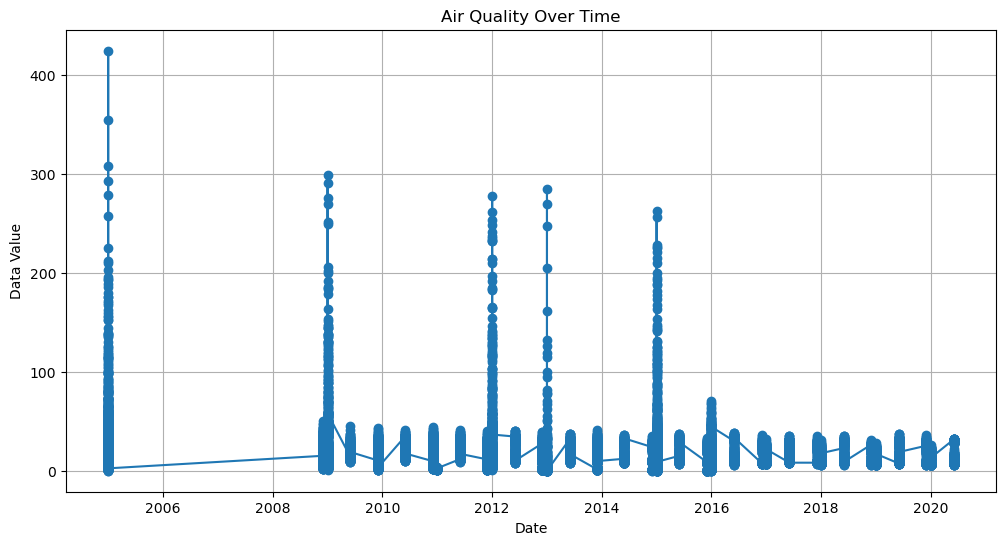

In [82]:
# Considering the column names under the air quality dataset from the CSV file
date_column = 'Start_Date'
numeric_column = 'Data Value'  

df_air[date_column] = pd.to_datetime(df_air[date_column])  
df_air = df_air.sort_values(by=date_column)  

plt.figure(figsize=(12, 6))
plt.plot(df_air[date_column], df_air[numeric_column], marker='o', linestyle='-') 
plt.title('Air Quality Over Time') 
plt.xlabel('Date') 
plt.ylabel(numeric_column) 
plt.grid(True)  
plt.show()  


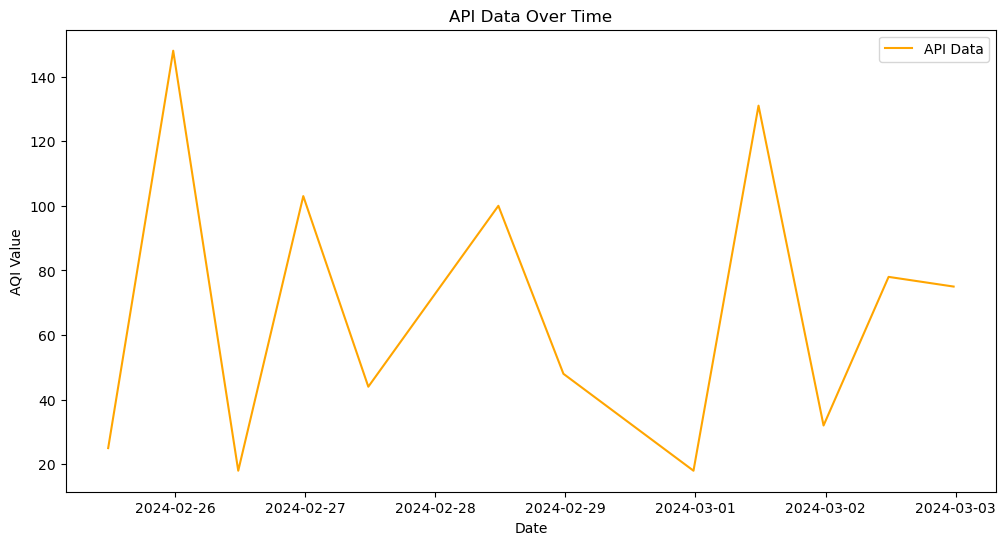

In [83]:
# Plotting time series of API data
df_api['SampleDateTime'] = pd.to_datetime(df_api['SampleDateTime'])  
df_api = df_api.sort_values('SampleDateTime') 
plt.figure(figsize=(12, 6))
plt.plot(df_api['SampleDateTime'], df_api['AQI_Value'], label='API Data', color='orange')
plt.title('API Data Over Time')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.legend()
plt.show()


C:\Users\RexAr\AppData\Local\Temp\ipykernel_17268\823981222.py:2: FutureWarning: Parsed string " 02/12/2024 00:00   EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df_water['Date and Time'] = pd.to_datetime(df_water['Date and Time'])


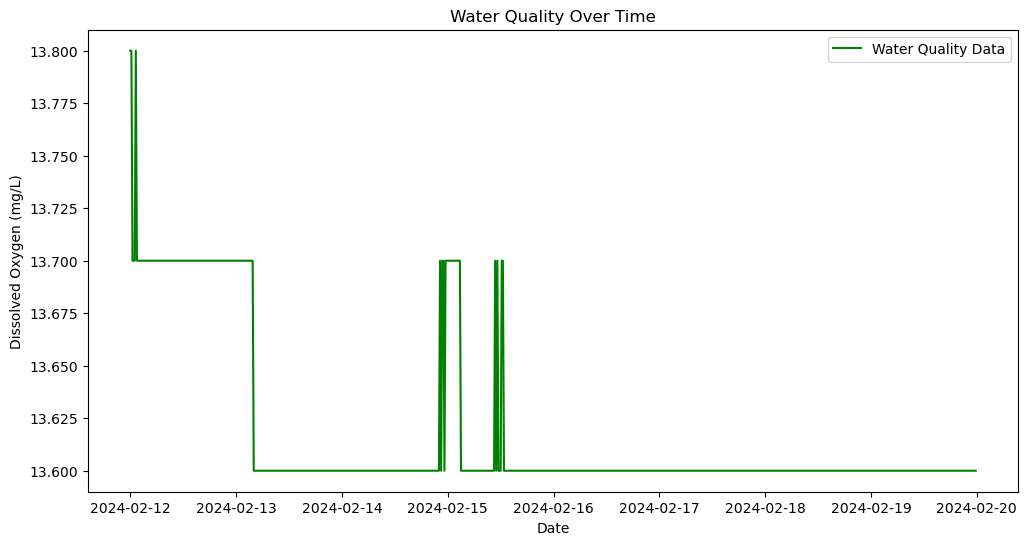

In [84]:
# Plotting time series of water quality data
df_water['Date and Time'] = pd.to_datetime(df_water['Date and Time'])  
df_water = df_water.sort_values('Date and Time')  
plt.figure(figsize=(12, 6))
plt.plot(df_water['Date and Time'], df_water['Dissolved Oxygen (mg/L)'], label='Water Quality Data', color='green')
plt.title('Water Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.legend()
plt.show()


Throughout the project, the intricacies of data wrangling were realized, uncovering the critical need for consistent datasets when aiming to integrate diverse environmental data. The initial objective was to conduct a comparative analysis between air quality and water quality datasets. However, there was a significant challenge when the temporal data did not align, preventing a direct comparison.
Efforts to merge the data using SQL were thwarted by varying date ranges, resorting to analysis of each dataset independently. Using Matplotlib for visualization, distinct plots were created for each dataset. This approach allowed for an examination of individual trends over time, despite the inability to consolidate the data into a unified visual representation.
There is ample room for improvement, especially in managing dates and times within datasets. For consideration is the importance of managing non-aligned data effectively. With regards to ethical data science, there's an understanding that data manipulation, such as cleaning or transforming to fit an analysis, must be approached with caution to avoid distorting the data narrative. To maintain integrity, it is important to practice meticulously documenting each change and verifying analysis by examining the data from multiple perspectives.
Despite these challenges and the oversight in acquiring temporally relevant datasets, I learned a valuable lesson: data always holds potential insights. Although the initial analytical path may be obstructed, there is still a wealth of information available. Through this project, I have definitely appreciated the technical knowledge gained while acknowledging a deeper appreciation for the ethical considerations that are integral to responsible data science.
